# Results

Lets talk about one specific result: the p-value.

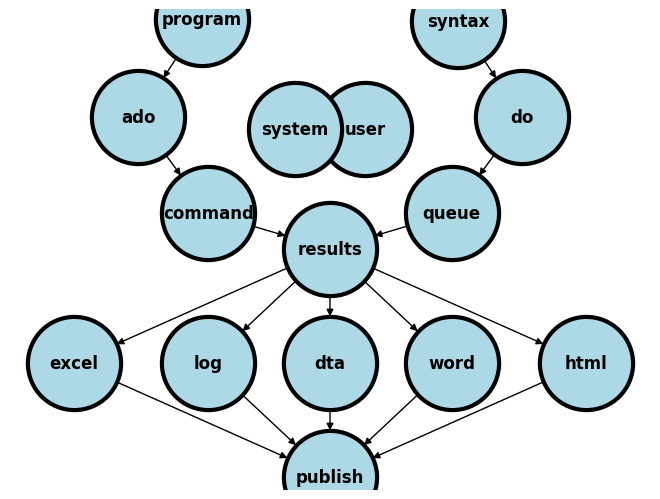

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

# P-value

The default is to report a p-value from a two-sided hypothesis test that the difference between two values is zero. As with all hypothesis tests, they rely on the reaonsable assumption from the <u>Central Limit Theorem</u> that the sampling distribution of every statistic distribution is normal, including the distribution of difference of log odds (i.e., log odds ratio)

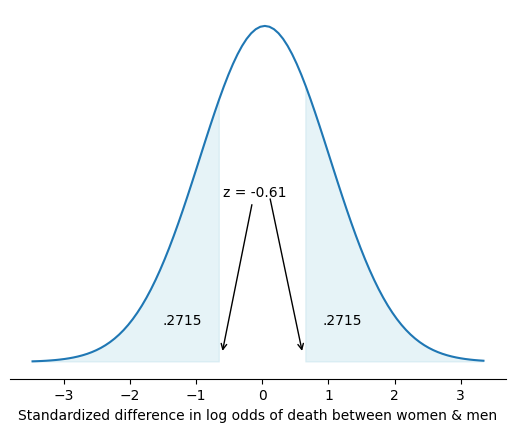

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data for the kernel density plot
data = np.random.normal(loc=0, scale=1, size=1000)

# Calculate the kernel density estimate
kde = np.linspace(data.min(), data.max(), 100)
kde_vals = norm.pdf(kde, loc=np.mean(data), scale=np.std(data))

# Create the plot
fig, ax = plt.subplots()
ax.plot(kde, kde_vals, label='Kernel Density Estimate')

# Define the critical value and significance level
critical_value = -0.61
significance_level = 0.05

# Shade the areas corresponding to the critical values
ax.fill_between(kde, kde_vals, where=(kde <= critical_value) | (kde >= -critical_value),
                color='lightblue', alpha=0.3)

# Add labels for the shaded areas
ax.text(critical_value - 0.3, 0.05, f'.2715', ha='right', va='center', fontsize=10)
ax.text(-critical_value + 0.3, 0.05, f'.2715', ha='left', va='center', fontsize=10)

# Add arrows pointing at the corresponding critical values
ax.annotate('z = -0.61', xy=(critical_value, 0.01), xytext=(critical_value + .01, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(-critical_value, 0.01), xytext=(-critical_value - 0.5, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Remove y-axis and related elements
ax.set_yticks([])
ax.set_ylabel('')

# Remove y-axis gridlines
ax.yaxis.grid(False)

# Remove y-axis spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the upper x-axis line
ax.spines['top'].set_visible(False)

# Set plot title and labels
ax.set_title('')
ax.set_xlabel('Standardized difference in log odds of death between women & men')

# Display the plot
plt.show()


# Two-sided

The p-value in the above case is:

In [3]:
.2715 * 2

0.543

In otherwords, to obtain a p-value all you need is the absolute value of a test statistic ($z$ statistic in this case). A $z$ statistic is simply the ratio of an estimate to its standard error

```stata
use transplants, clear 
logistic died prev age gender race dx bmi peak_pra don_ecd wait_yrs 
```

```stata

. use transplants, clear 

. logistic died prev age gender race dx bmi peak_pra don_ecd wait_yrs

Logistic regression                                     Number of obs =  1,518
                                                        LR chi2(9)    = 114.86
                                                        Prob > chi2   = 0.0000
Log likelihood = -518.87252                             Pseudo R2     = 0.0996

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     prev_ki |    .941235   .3097531    -0.18   0.854     .4938263    1.793998
         age |   1.052174   .0078088     6.85   0.000      1.03698    1.067591
      gender |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
        race |   .8689853   .0496138    -2.46   0.014     .7769875     .971876
          dx |   1.036562   .0277149     1.34   0.179     .9836403    1.092331
         bmi |   .9869627   .0165649    -0.78   0.434     .9550244    1.019969
    peak_pra |   .9989866   .0034624    -0.29   0.770     .9922234    1.005796
     don_ecd |   1.775691   .3403014     3.00   0.003     1.219662    2.585208
    wait_yrs |   .9609635   .0432799    -0.88   0.377     .8797726    1.049647
       _cons |   .0143836   .0095138    -6.41   0.000     .0039342    .0525873
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.

```

In the above multivariable logistic regression, we can manually estimate the $z$ statistic for the hypothesis of $zero$ difference in risk of death among female vs. male kidney transplant recipients. Below the - sign points to longer odds for men; however, $|z|<2$ and so the difference in odds by gender is not statistically significant.

```stata
di = _b[gender]/_se[gender]
```

```stata

. 
end of do-file

. di = _b[gender]/_se[gender]
-.60781897

. 

```

Here are three p-values worth committing to memory based on $z$ statistics (or $\sigma$) of 1, 2, and 3 (only values with ticks in figure above). The corresponding %CIs are $\pm   z$. With these three committed to memory, one may perform `back-of-the-envelope` estimates of p-values without any software, as done above.

```stata
di 2*(1-normal(abs(1)))
di 2*(1-normal(abs(2)))
di 2*(1-normal(abs(3)))
```

```stata

. di 2*(1-normal(abs(1)))
.31731051

. di 2*(1-normal(abs(2)))
.04550026

. di 2*(1-normal(abs(3)))
.0026998

. 
end of do-file

. 

```

The corresponding %CI of the $z$ statistic (also the most common null-hypothesis) are 68%, 95%, and 99.7%. So very quickly you can conclude that the unshaded area in the figure above is less than 68% (since $|z| < 1$).

```stata
di 1 - 2*(1-normal(abs(1)))
di 1 - 2*(1-normal(abs(2)))
di 1 - 2*(1-normal(abs(3)))
```

```stata


. di 1 - 2*(1-normal(abs(1)))
.68268949

. di 1 - 2*(1-normal(abs(2)))
.95449974

. di 1 - 2*(1-normal(abs(3)))
.9973002

. 

```

Building on these ideas, here's a `flexible program' that enables a Stata 13 user to get a z-statistic, p-value, and 95% CI :

```stata
capture program drop stata13
program define stata13
    syntax varlist, test(numlist)
	
	local y: di word("`varlist'",1)
	if `test' == 1 {
		di in red "The outcome can't be tested!"
		exit 340
	}
	noi logistic `varlist'
	local x`test': di word("`varlist'",`test')	
	cls
	scalar z = _b[`x`test'']/_se[`x`test'']
	noi di "z statistic for `x`test'': " z
	scalar p = 2*(1-normal(abs(z)))
	noi di "p-value for `x`test'': " p 
	di "lower bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.025) * _se[`x`test''])
	di "upper bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.975) * _se[`x`test''])	
	lincom `x`test''

end 

use transplants, clear 
stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)


```

```stata

. use transplants, clear 

. stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)

Logistic regression                                     Number of obs =  1,518
                                                        LR chi2(9)    = 114.86
                                                        Prob > chi2   = 0.0000
Log likelihood = -518.87252                             Pseudo R2     = 0.0996

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     prev_ki |    .941235   .3097531    -0.18   0.854     .4938263    1.793998
         age |   1.052174   .0078088     6.85   0.000      1.03698    1.067591
      gender |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
        race |   .8689853   .0496138    -2.46   0.014     .7769875     .971876
          dx |   1.036562   .0277149     1.34   0.179     .9836403    1.092331
         bmi |   .9869627   .0165649    -0.78   0.434     .9550244    1.019969
    peak_pra |   .9989866   .0034624    -0.29   0.770     .9922234    1.005796
     don_ecd |   1.775691   .3403014     3.00   0.003     1.219662    2.585208
    wait_yrs |   .9609635   .0432799    -0.88   0.377     .8797726    1.049647
       _cons |   .0143836   .0095138    -6.41   0.000     .0039342    .0525873
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.
z statistic for gender: -.60781897
p-value for gender: .54330755
lower bound of 95% CI for gender: .63054792
upper bound of 95% CI for gender: 1.2748661

 ( 1)  [died]gender = 0

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         (1) |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
------------------------------------------------------------------------------

```

Lets test this programs flexibility by using a different dataset:

```stata
webuse lifeexp, clear 
drop if region==1
replace region=3-region
stata13 region lexp safewater gnppc popgrowth, test(2)

```

```stata

. webuse lifeexp, clear 
(Life expectancy, 1998)

. drop if region==1
(44 observations deleted)

. replace region=3-region
(24 real changes made)

. stata13 region lexp safewater gnppc popgrowth, test(2)

Logistic regression                                     Number of obs =     21
                                                        LR chi2(4)    =   0.16
                                                        Prob > chi2   = 0.9971
Log likelihood = -14.454224                             Pseudo R2     = 0.0054

------------------------------------------------------------------------------
      region | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        lexp |   .9484384   .1303485    -0.39   0.700     .7244766    1.241635
   safewater |   1.010336   .0428857     0.24   0.809     .9296832    1.097986
       gnppc |   1.000011   .0001483     0.08   0.938      .999721    1.000302
   popgrowth |   .8985873   .7424254    -0.13   0.897     .1779449    4.537691
       _cons |   25.38364   213.5416     0.38   0.701     1.75e-06    3.68e+08
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.
z statistic for lexp: -.38518898
p-value for lexp: 1.2
lower bound of 95% CI for lexp: .72447663
upper bound of 95% CI for lexp: 1.2416349

 ( 1)  [region]lexp = 0

------------------------------------------------------------------------------
      region | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         (1) |   .9484384   .1303485    -0.39   0.700     .7244766    1.241635
------------------------------------------------------------------------------

```

The p-value calculation needs debugging. Otherwise, everything else looks good!

![](chatGPTflex.)

# chatGPT

I copied & pasted the entire program Stata13 into chatGPT including a test example. And without any further prompting, chatGPT provided rich documentation, which I personally prefer to annotation. We finally get to seperate code from text. And that's how this class book is also set up. There are interspersed code and text blocks, but very minimal annotation within the code.

$\vdots$

![](chatGPTflex.png)

The given code appears to define a program called "stata13" in Stata version 13. The program is designed to perform logistic regression analysis and calculate various statistics such as z-statistic, p-value, and confidence intervals.     
     
Here's a breakdown of the code:     

```stata
program define stata13
    syntax varlist, test(numlist)

```

This line defines a program called "stata13" that takes two arguments: `varlist`, which represents a list of variables, and `test`, which is a numeric list.

```stata
    local y: di word("`varlist'",1)
    if `test' == 1 {
        di in red "The outcome can't be tested!"
        exit 340
    }

```

This section extracts the first variable from `varlist` and assigns it to the local macro `y`. It then checks if the `test` argument is equal to 1. If it is, it displays a message indicating that the outcome variable cannot be tested and exits the program with error code 340.

```stata
    noi logistic `varlist'
    local x`test': di word("`varlist'",`test')   
    cls

```

These lines perform a logistic regression analysis using the variables specified in `varlist`. It then extracts the `test`-th word from `varlist` and assigns it to the local macro `x`test''. The `cls` command clears the Stata output window.

```stata
    scalar z = _b[`x`test'']/_se[`x`test'']
    noi di "z statistic for `x`test'': " z
    scalar p = 2*(1-normal(abs(z)))
    noi di "p-value for `x`test'': " p 
    di "lower bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.025) * _se[`x`test''])
    di "upper bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.975) * _se[`x`test''])   

```

These lines calculate the z-statistic, p-value, and 95% confidence intervals for the `test`-th variable. The z-statistic is computed as the coefficient divided by its standard error. The p-value is calculated as 2 times the area under the normal distribution curve beyond the absolute value of the z-statistic. The confidence intervals are computed using the coefficient, standard error, and the inverse of the standard normal distribution at the specified quantiles.

```stata
lincom `x`test''
```


This line performs a linear combination test using the `test`-th variable.

Finally, the program is called with a specific dataset and variables: `transplants` dataset with the variables `died`, `prev`, `age`, `gender`, `race`, `dx`, `bmi`, `peak_pra`, `don_ecd`, and `wait_yrs`. The `test(4)` argument indicates that the analysis should be performed on the 4th variable (`gender`).

Note that the provided code is specific to Stata version 13. If you're using a newer version of Stata, you may need to make adjustments to the code to ensure compatibility.